### Clean Training Data
#### Inputs
- Flow data from Sensirion data gathering software (csv)
- Sensor data from Read_Write_Sensor python script

#### Outputs
- Export Flow csv file
- Export SensorData csv file

#### Notes
- Make sure to line up timescales prior to exporting
- Next step is to scale in Matlab

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

df = pd.read_csv('11.14_Sensors_Standing_1.csv')
flow = pd.read_csv('11.14_Standing_1.csv')

In [96]:
hours = []
minutes = []
seconds = []

for i in range(0, len(flow)):
    t = flow['Time'][i]
    a = t.split(':')
    hours.append(float(a[0]))
    seconds.append(float(a[2]))
    minutes.append(float(a[1]))
    
flow['Hours'] = hours
flow['Minutes'] = minutes
flow['Seconds'] = seconds
flow.drop('Date', inplace = True, axis = 1)
flow.drop('Sample #', inplace = True, axis = 1)
flow.drop('Time', inplace = True, axis = 1)
flow.columns = ['Flow', 'hours', 'minutes', 'seconds']
flow.head()

,Flow,hours,minutes,seconds
0,-0.033,11.0,10.0,54.9202
1,0.000,11.0,10.0,54.9207
2,0.000,11.0,10.0,54.9212
3,0.000,11.0,10.0,54.9217
4,-0.033,11.0,10.0,54.9222


In [97]:
seconds = []
minutes = []
hours = []

for i in range(0, len(df)):
    t = datetime.datetime.fromtimestamp(df['timeTracker'][i]).strftime('%Y-%m-%d %H:%M:%S.%f')
    a = t.split(' ')
    t = a[1].split(':')
    hours.append(float(t[0]))
    seconds.append(float(t[2]))
    minutes.append(float(t[1]))
    
df.drop('timeTracker', inplace = True, axis = 1)
df['Time Hours'] = hours
df['Time Minutes'] = minutes
df['Time Seconds'] = seconds
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.263676,0.256701,0.265289,0.317746,0.000000,0.000000,0.000000,0.000000,11.0,11.0,6.630759
1,0.268053,0.256701,0.265289,0.317746,0.239451,0.000000,0.000000,0.000000,11.0,11.0,6.639897
2,0.263651,0.248454,0.256474,0.308153,-0.066954,-0.289165,-0.309080,-0.336319,11.0,11.0,6.649405
3,0.256999,0.240054,0.253665,0.303255,-0.347309,-0.528409,-0.304265,-0.412395,11.0,11.0,6.658855
4,0.252956,0.234933,0.253337,0.300304,-0.375340,-0.525852,-0.225151,-0.374949,11.0,11.0,6.668664


In [146]:
df[0:10000]

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.263676,0.256701,0.265289,0.317746,0.000000,0.000000,0.000000,0.000000,11.0,11.0,6.630759
1,0.268053,0.256701,0.265289,0.317746,0.239451,0.000000,0.000000,0.000000,11.0,11.0,6.639897
2,0.263651,0.248454,0.256474,0.308153,-0.066954,-0.289165,-0.309080,-0.336319,11.0,11.0,6.649405
3,0.256999,0.240054,0.253665,0.303255,-0.347309,-0.528409,-0.304265,-0.412395,11.0,11.0,6.658855
4,0.252956,0.234933,0.253337,0.300304,-0.375340,-0.525852,-0.225151,-0.374949,11.0,11.0,6.668664
...,...,...,...,...,...,...,...,...,...,...,...
6594,0.550851,0.492278,0.629610,0.476725,0.164920,0.154477,0.210683,0.226793,11.0,12.0,17.672887
6595,0.551251,0.494322,0.630262,0.477035,0.153650,0.156093,0.194201,0.206397,11.0,12.0,17.683681
6596,0.551625,0.496296,0.630865,0.477320,0.142724,0.157310,0.178436,0.186206,11.0,12.0,17.694498
6597,0.551976,0.498200,0.631425,0.477582,0.132339,0.158234,0.163730,0.166946,11.0,12.0,17.705207


In [148]:
flow[22648:158671]

,Flow,a


In [138]:
flow = flow[22648:158671]

In [139]:
from scipy import signal
raw_data = flow['Flow']

In [140]:
flow_resample = signal.resample(raw_data, len(df['1']))

In [141]:
len(flow_resample)

6599

In [142]:
len(df)

6599

In [143]:
export_csv = pd.DataFrame(flow_resample).to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/Standing_1.csv', header = True, index = None)

In [144]:
export_csv = df.to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/Standing_1_Sensors.csv', header = True, index = None)

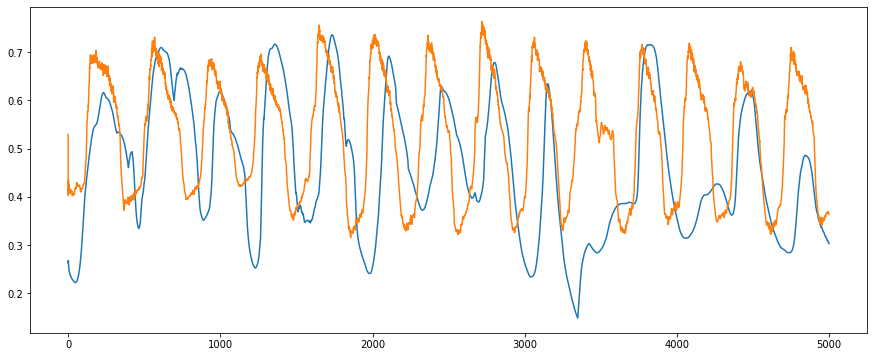

In [145]:
flow = pd.read_csv('Standing_1.csv')
flow.columns = ['Flow']

x = range(0, len(df))
flow['a'] = (flow['Flow'] / 200) - 0.5
fig = plt.figure(figsize = (15, 6))
plt.plot(x[0:5000], df['1'][0:5000], x[0:5000], flow['a'][0:5000]*-1)